In [1]:
from IPython.display import YouTubeVideo

# W4 Lab Assignment

The aims of today's lab is 

1. to do a mini-experiment of the Stevens' power-law (of course you can conduct your own psychophysics experiments!)
2. to play with matplotlib's colormaps, including the awesome `vidiris`. 

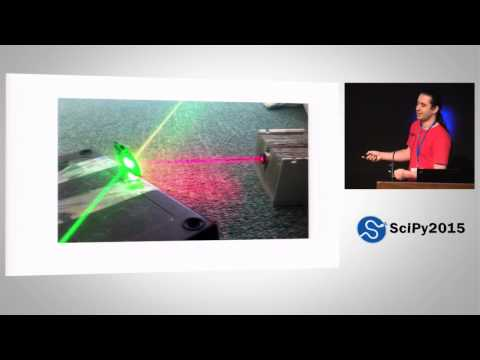

In [2]:
YouTubeVideo("xAoljeRJ3lU")

First, import `numpy` and `matplotlib` libraries (don't forget the `matplotlib inline` magic command). 

In [3]:
# Your code
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Stevens’ power-law and your own psychophysics experiment!

Let's do the experiment. The procedure is as follows:

1. Generate a random number between \[0.01,0.1\];
1. Use a horizontal bar to represent the number, i.e., the length of the bar is equal to the number;
1. Guess the length of the bar by comparing it to two other bars with length 0.01 and 0.1 respectively;
1. Store your guess (perceived length) and actual length to two lists respectively;
1. Repeat the above steps many times;
1. Check whether Steven's power-law holds.

First, we use two lists to store perceived and actual length.

In [4]:
import random
import time

n1 = 0.01
length_perceived = []
length_actual = []

## Perception of length

Let's run the experiment.

The [**`random`**](https://docs.python.org/2/library/random.html) module in Python provides various random number generators, and the [**`random.uniform(a,b)`**](https://docs.python.org/2/library/random.html#random.uniform) function returns a float in \[a,b\]. 

We can plot horizontal bars using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function. The lengths of them are 0.01, `n2`, 0.1. Using this function, produce a bar graph that looks like this:

![](stevenspowerlaw_barh.png)

<Container object of 3 artists>

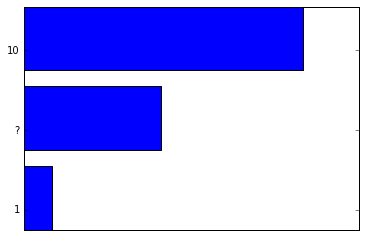

In [5]:
plt.gca().set_frame_on(True)
plt.gca().get_xaxis().set_visible(False)
plt.yticks(np.arange(3)+0.25, ('1', '?', '10'))

# TODO: generate a random number in [0.01, 0.1) using random.uniform(a,b) function and n1
# Your code
n2 = 0.1
rand_num = random.uniform(n1,n2)
# Your code 
plt.barh(np.arange(3), (n1,rand_num,n2))


From the plot above, guess the ratio between the length of the middle and the bottom bar. We can think of this more directly: If the length of the bottom bar is 1 and the top one is 10, what is the length of the middle one?

Put your guess (perceived length) in `length_perceived.append()`. And the `length_actual.append(n2/n1)` will store the actual ratio.

In [6]:
length_actual.append(rand_num)

# put the ratio that you guessed and run this cell. replace "3" with your guess and press shift + enter. 
length_perceived.append(0.04) 

## Obtaining and plotting the data

Run the above two cells many times, namely: (1) generate a random bar graph, (2) put your guess into `length_perceived` while entering the actuall ratio into `length_actual`

Now we can draw the scatter plot of perceived and actual length. The [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function will do this. Here is an example of how to use `scatter`:

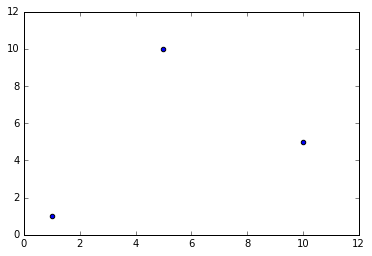

In [7]:
plt.scatter([1,5,10], [1,10, 5])

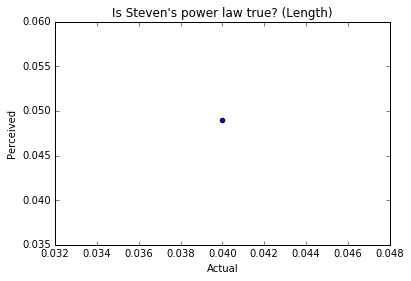

In [8]:
# Your code
plt.scatter(length_perceived,length_actual)

# Don't forget to label the axes!
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")

After plotting, let's fit the relation between actual and perceived lengths using a polynomial function. We can easily do it using [**`curve_fit(f, x, y)`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in Scipy, which is to fit $x$ and $y$ using the function `f`. In our case, $f = a*x^b +c$. For instance, we can check whether this works by creating a fake dataset that follows the exact form:

In [9]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x = np.arange(20)  # [0,1,2,3, ..., 19]
y = np.power(x, 2) # [0,1,4,9, ... ]

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + -0.00


Now you can fit your data. 

In [10]:
# Your code

def func(x, a, b, c):
    return a * np.power(x, b) + c

popt, pcov = curve_fit(func, length_actual, length_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))



TypeError: Improper input: N=3 must not exceed M=1

## Perception of area

Similar to the above experiment, we now represent a random number as a circle, and the area of the circle is equal to the number.

First, calculate the radius of a circle from its area and then plot using the **`Circle()`** function. `plt.Circle((0,0), r)` will plot a circle centered at (0,0) with radius `r`.

In [ ]:
import math

radius1 = math.sqrt(n1/math.pi) # area = pi * r * r
radius2 = math.sqrt(n2/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)

Write the code to run the experiment in a similar way, plot and fit your results in the cell below. (Feel free to create multiple cells below)

In [ ]:
# Your code
Actual = []
perceived = []


In [ ]:
rand_num = random.uniform(n1,n2)

radius1 = math.sqrt(n1/math.pi) # area = pi * r * r
radius2 = math.sqrt(n2/math.pi)
radius3 = math.sqrt(rand_num/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),      radius1, clip_on=False )
circ3 = plt.Circle((2*radius3,0), radius3, clip_on=False)
plt.gca().add_artist(circ1)
plt.gca().add_artist(circ3)



In [ ]:
Actual.append(rand_num)

# put the ratio that you guessed and run this cell.  
perceived.append(0.06) 

In [ ]:
print(Actual)
print(perceived)

Show the scatter plot and the curve fit. Does it follow Stevens' power-law?

In [ ]:
# Your code
plt.scatter(Actual,perceived)


plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")

I observe that the steven's power law is holding true.There are more number of outliers in predicting the radius than the length, but the law stills holds good.



# Colormaps

Let's plot a sine and cosine wave respectively with red and green color.

In [ ]:
x = np.linspace(0, 3*np.pi)
plt.plot(x, np.sin(x), color='r', lw=3)
plt.plot(x, np.sin(x-np.pi), color='g', lw=3)

We can also use different color schemes in matplotlib. Here you can find them

http://matplotlib.org/users/colormaps.html

In [ ]:
plt.plot(x, np.sin(x), color=plt.cm.Accent(0), lw=3)
plt.plot(x, np.sin(x-np.pi), color=plt.cm.Accent(1.0), lw=3)

In [ ]:
num_lines = 5
x = np.linspace(0, 4*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Accent(color_idx[i]), lw=3)

Pick two color schemes from ![qualitative colormaps](http://matplotlib.org/_images/colormaps_reference_04.png) and reproduce the above plot.

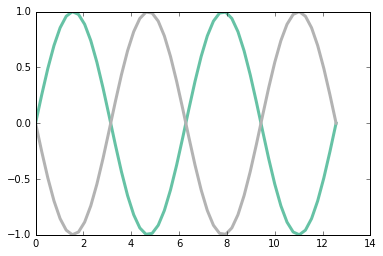

In [11]:
# Your code
num_lines = 2
x = np.linspace(0, 4*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Set2(color_idx[i]), lw=3)

# Seaborn color palettes

These are essentially based on matplotlib, but Seaborn makes pre-defined, good-looking palettes that you can use.

See: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.color_palette.html#seaborn.color_palette
    https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html


In [15]:
import seaborn as sns

From https://stanford.edu/~mwaskom/software/seaborn/examples/timeseries_of_barplots.html

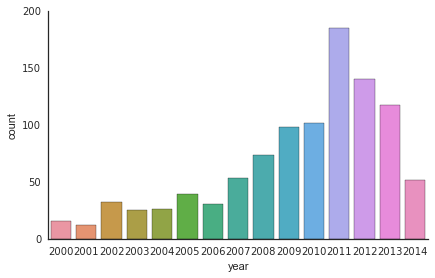

In [16]:
sns.set(style="white")

# Load the example planets dataset
planets = sns.load_dataset("planets")
years = np.arange(2000, 2015)

#Make a barplot with default color
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years)

To specify a palette:

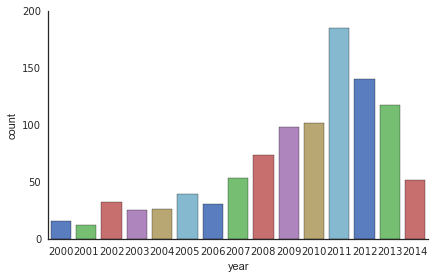

In [17]:
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years, palette="muted")

We can also create a palette, and pass it as an argument:

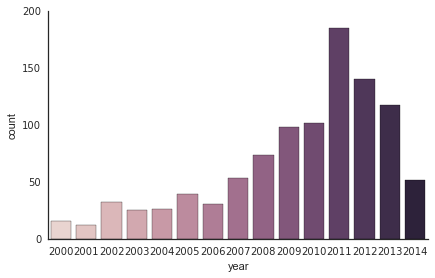

In [18]:
p = sns.cubehelix_palette(15)
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years, palette=p)

# Colormap and images

http://matplotlib.org/users/image_tutorial.html

We can also display an image using Colormaps. First read it using the [`imread()`](http://matplotlib.org/api/image_api.html#matplotlib.image.imread) function that returns an `numpy.array()`.

In [19]:
import matplotlib.image as mpimg

In [20]:
img = mpimg.imread('C:/Users/parmeet08/Desktop/Data Visualization/sneakySnake.png')

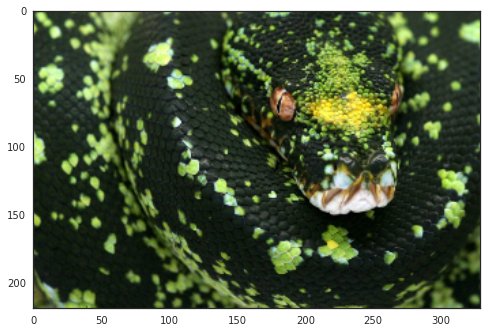

In [21]:
plt.imshow(img)

How does `img` store the image? Run the following cells

In [22]:
img

array([[[ 0.15294118,  0.21568628,  0.14117648,  1.        ],
        [ 0.16470589,  0.22745098,  0.15686275,  1.        ],
        [ 0.17254902,  0.24705882,  0.14509805,  1.        ],
        ..., 
        [ 0.1882353 ,  0.22352941,  0.17647059,  1.        ],
        [ 0.1882353 ,  0.23921569,  0.18039216,  1.        ],
        [ 0.21960784,  0.29803923,  0.21176471,  1.        ]],

       [[ 0.1882353 ,  0.25490198,  0.17647059,  1.        ],
        [ 0.18431373,  0.26274511,  0.16470589,  1.        ],
        [ 0.3019608 ,  0.40392157,  0.25098041,  1.        ],
        ..., 
        [ 0.18431373,  0.21176471,  0.18039216,  1.        ],
        [ 0.18039216,  0.21960784,  0.18431373,  1.        ],
        [ 0.17254902,  0.22745098,  0.17647059,  1.        ]],

       [[ 0.18431373,  0.25098041,  0.18039216,  1.        ],
        [ 0.24705882,  0.34117648,  0.2       ,  1.        ],
        [ 0.41960785,  0.5529412 ,  0.31764707,  1.        ],
        ..., 
        [ 0.2       ,  0

In [162]:
np.shape(img)

(219L, 329L, 4L)

This means that `img` is a three-dimensional array with 219 x 329 x 4 numbers. If you look at the image, you can easily see that 219 and 329 are the dimensions (height and width in terms of the number of pixels) of the image. What is 4? 

We can actually create our own small image to investigate. Let's create a 3x3 image. 

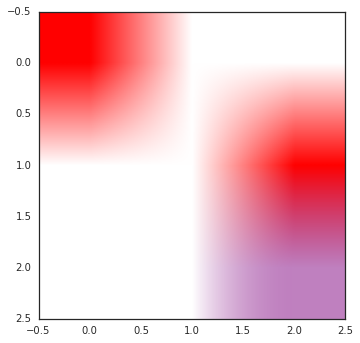

In [163]:
myimg = np.array([ [[1,0,0,1], [1,1,1,1], [1,1,1,1]], 
                   [[1,1,1,1], [1,1,1,1], [1,0,0,1]], 
                   [[1,1,1,1], [1,1,1,1], [1,0,1,0.5]] ])
plt.imshow(myimg)

In [164]:
np.shape(myimg)

(3L, 3L, 4L)

Why are they blurred? It should have only 3 pixels across, right? It's because of `interpolation`. By setting it to `nearest` you can get the raw pixel values more clearly. 

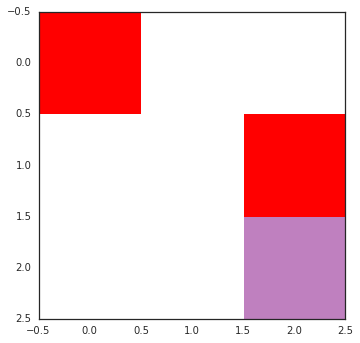

In [165]:
plt.imshow(myimg, interpolation="nearest")

Play with the values of the matrix, and explain what are each of the four dimensions (this matrix is 3x3x**4**) below. 

YOUR ANSWER HERE:
Number of channels - 4
It returns a tuple of number of rows, columns and channels - [3,3,4]

## Applying other colormaps

Let's assume that the first value of the four dimensions represents some data of your interest. You can obtain `height x width x 1` matrix by doing `img[:,:,0]`, which means give me the all of the first dimension (`:`), all of the second dimension (`:`), but only the first one from the last dimension (`0`). 

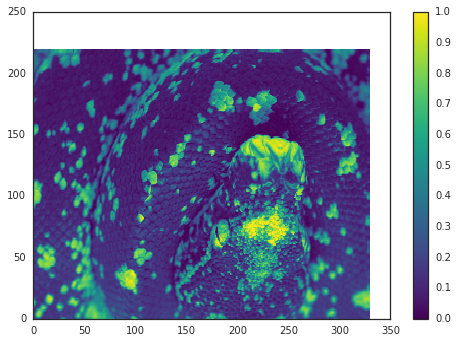

In [166]:
plt.pcolormesh(img[:,:,0], cmap=plt.cm.viridis)
plt.colorbar()

In [167]:
img[:,:,0]

array([[ 0.15294118,  0.16470589,  0.17254902, ...,  0.1882353 ,
         0.1882353 ,  0.21960784],
       [ 0.1882353 ,  0.18431373,  0.3019608 , ...,  0.18431373,
         0.18039216,  0.17254902],
       [ 0.18431373,  0.24705882,  0.41960785, ...,  0.2       ,
         0.17254902,  0.17647059],
       ..., 
       [ 0.33725491,  0.29803923,  0.28235295, ...,  0.1254902 ,
         0.10196079,  0.06666667],
       [ 0.28235295,  0.25490198,  0.25882354, ...,  0.06666667,
         0.05882353,  0.0627451 ],
       [ 0.20784314,  0.21568628,  0.24313726, ...,  0.05098039,
         0.06666667,  0.07450981]], dtype=float32)

Why is it flipped upside down? Take a look at the previous `imshow` example closely and compare the axes across these two displays. Below, flip the figure upside down to show it properly. This function [`numpy.flipud()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.flipud.html) should be handy. 

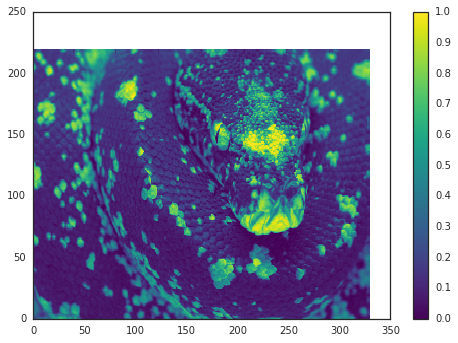

In [168]:
# your code


plt.pcolormesh(np.flipud(img[:,:,0]), cmap=plt.cm.viridis)
plt.colorbar()